In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
cd = pd.read_csv('Classified Data.csv',index_col=0)
#cd.drop('Unnamed: 0' ,axis=1 , inplace=True)
cd.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# Scale of variable matters a lot in KNN as larger scale variable will make results varry
# So we need to first make data to same scale 

from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(cd.drop("TARGET CLASS" , axis=1))

StandardScaler()

In [7]:
scaled_values = scaler.transform(cd.drop("TARGET CLASS" , axis=1))

In [8]:
# making the scaled classified data into a new dataframe

scaled_cd = pd.DataFrame(scaled_values, columns = cd.columns[:-1])

In [9]:
X = scaled_cd 
y = cd[['TARGET CLASS']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.3 )

In [12]:
# getting the KNN model form the sklearn lib
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# 'k' in KNN is a parameter that refers to the number of nearest neighbours to include in the majority of the voting process
# we need to specify the value of k for which we are predicting the nearest distance between points
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [15]:
predict = knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       139
           1       0.91      0.91      0.91       161

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [18]:
# since value of K causes a lot of difference in the precdition we need to consider lot of K values for getting minimum error in prediction
# we use Elbow method to get value of K where the error is minimum
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values))



C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Text(0, 0.5, 'Error Rate')

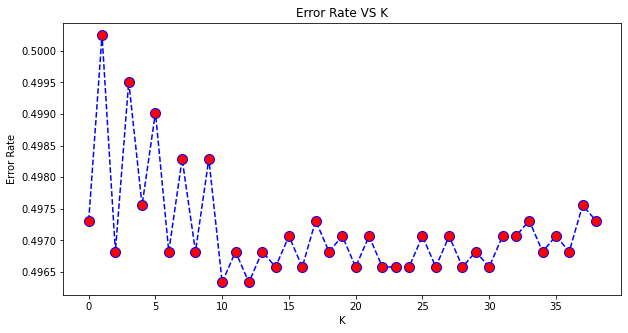

In [19]:
# this graph shows the different value of k with the error.
# We will take the closest value where the graphs falls and is most 


plt.figure(figsize=(10,5))
plt.plot(error_rate ,color="blue", linestyle = 'dashed' , marker ='o' , markerfacecolor="red" , markersize=10 )
plt.title("Error Rate VS K")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
# taking K=32 as the distribution is stable here 

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       139
           1       0.93      0.94      0.94       161

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



C:\Users\mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
